# **Bank Marketing With Social and Economic Concept Through Data Analysis**
A study by Serhet Gökdemir
[Click Here For Further Information About Me](https://serhetgokdemir.github.io)
## **Chapters**

1. Introduction
  * 1.1 About the Work
  * 1.2 Data Inspection
2. Exploratory Data Analysis
  * 2.1 Start
  * 2.2 Descriptive Statistics of the Data
  * 2.3 Univarite Analysis
        * 2.3.1 Numeric Features
        * 2.3.2 Categorical Features
  * 2.4 Bivariate and Multivariate Analysis
        * 2.4.1 Categorical - Categorical Features
        * 2.4.2 Categorical- Numeric Features
        * 2.4.3 Numeric - Numeric Features
        * 2.4.4 Multivariate Analysis
  * 2.5 Conclusion I
3. Data Preparation
  * 3.1 Preparation
  * 3.2 Conclusion II
4. Dimensionality Reduction
  * 4.1 Deciding Which Method to Use
  * 4.2 Application of the Method
  * 4.3 Conclusion III

# **1.0 Introduction**





### 1.1 About the Work

In this notebook, we will perform a comprehensive analysis of a **Bank Marketing Dataset** through key stages of the data science workflow. The focus is on:

1. **Exploratory Data Analysis (EDA)**: EDA is a crucial step in understanding the dataset before diving into more complex analyses. We will focus on two main subheads: Univariate Analysis and Multivariate Analysis

2. **Data Prepearing**: Once the data is explored, we will proceed to prepare the data for modeling. This involves handling missing data, encoding categorical variables, scaling numerical features, and ensuring the dataset is ready for analysis. Proper data preparation is critical for achieving accurate and reliable results.

3. **Dimensionality Reduction**: To reduce the complexity of the data and improve the performance of machine learning algorithms, dimensionality reduction techniques like PCA, t-SNE (and maybe SVD, NMF, UMAP) will be applied. This step helps in extracting the most relevant features from a large set of variables, enhancing both computation time and model interpretability.

### 1.2 Data Inspection

First of all we need to set up the environment for the data analysis. The codes below used for importing the necessary libraries, making Google Drive usable and reading the CSV file.

In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="bright")


from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/Colab Notebooks/bank-additional-full.csv"
bank_data = pd.read_csv(file_path, delimiter=';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A quick explanation for Input Variables:

bank client data:
   1. `age` : (numeric)
   2. `job` : type of job
   3.  `marital` : marital status
   4.  `education`
   5. `default` : has credit in default?
   6.  `housing` : has housing loan?
   7.  `loan` : has personal loan?
   
related with the last contact of the current campaign
   8.  `contact `: contact communication type
   9.  `month` : last contact month of year
   10.  `day_of_week` : last contact day of the week
   11.  `duration` : last contact duration, in seconds

other attributes
   12.  `campaign` : number of contacts performed during this campaign and for this client
   13.  `pdays` : number of days that passed by after the client was last contacted from a previous campaign
   14.  `previous` : number of contacts performed before this campaign and for
   15.  `poutcome` : outcome of the previous marketing campaign

social and economic context attributes
   16.  `emp.var.rate` : employment variation rate - quarterly indicator
   17.  `cons.price.idx` : consumer price index - monthly indicator    
   18.  `cons.conf.idx` : consumer confidence index - monthly indicator
   19.  `euribor3m` : euribor 3 month rate - daily indicator
   20.  `nr.employed` : number of employees - quarterly indicator

Output variable (desired target):
   21. `y` : has the client subscribed a term deposit? (binary: "yes","no")


**Important notes**:

* The attribute "**duration**" highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Therefore I am going to exclude duration from my data.

It's best to specify categorical columns and numerical columns in a list right now.

In [55]:
categorical_columns = ["job", "marital", "education", "default", "housing", "loan",
                      "contact", "month", "day_of_week", "poutcome", "y"]

numeric_columns = ["age", "campaign", "pdays",
                   "previous", "emp.var.rate",	"cons.price.idx",
                   "cons.conf.idx",	"euribor3m",	"nr.employed"]

In [56]:
bank_data.shape

(41188, 21)

In [57]:
bank_data.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [58]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Let's see if the data has any missing values.

In [59]:
bank_data.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


Great! does not have any missing values. Let's check the data from other perspections.

In [60]:
bank_data.min()

,0
age,17
job,admin.
marital,divorced
education,basic.4y
default,no
housing,no
loan,no
contact,cellular
month,apr
day_of_week,fri


In [61]:
bank_data.max()

,0
age,98
job,unknown
marital,unknown
education,unknown
default,yes
housing,yes
loan,yes
contact,telephone
month,sep
day_of_week,wed


I sense some outliers here. For example:
* pdays = 999

etc.

In the notepad of the data file, it says: "pdays: 999 means client was not previously contacted"

But since I don't have really a trustable domain knowledge, I will investigate about outliers in the next parts with mathematical methods.

Now I am going to investigate if there are any  misentered values

In [62]:
print(bank_data["job"].unique())
print(bank_data["marital"].unique())
print(bank_data["education"].unique())
print(bank_data["contact"].unique())
print(bank_data["month"].unique())
print(bank_data["day_of_week"].unique())
print(bank_data["y"].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
['no' 'yes']


The dot at the end of "admin" job is unnecessary. I want it to be without dot at the end.

 I also don't want any dots in the education category.

In [63]:
bank_data["job"] = bank_data["job"].str.replace(".","")
bank_data["education"] = bank_data["education"].str.replace("."," ")

print(bank_data["job"].unique())
print(bank_data["education"].unique())

['housemaid' 'services' 'admin' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['basic 4y' 'high school' 'basic 6y' 'basic 9y' 'professional course'
 'unknown' 'university degree' 'illiterate']


We have no values that entered in wrong format or with typos anymore, this is fine.

# **2.0 Exploratory Data Analysis**

### 2.1 Start

> **Q:** What is Exploratory Data Analysis?

> **A:** In statistics, **exploratory data analysis (EDA)** is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling and thereby contrasts with traditional hypothesis testing, in which a model is supposed to be selected before the data is seen.

We can start by taking a look at the first rows of the data.

In [64]:
pd.set_option('display.max_columns', None)
display(bank_data.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic 4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin,married,basic 6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


Also I will use plots with many different plots. So I want to set a color setting for them because they have good contrast and median lines look easily when we use pastel colors in box plots.

In [65]:
sns.set_palette("pastel")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=sns.color_palette("Set2"))

### 2.2 Descriptive Statistics of the Data

> A descriptive statistic (in the count noun sense) is a summary statistic that quantitatively describes or summarizes features from a collection of information, while descriptive statistics (in the mass noun sense) is the process of using and analysing those statistics.

> Some measures that are commonly used to describe a data set are measures of **central tendency** and measures of **variability** or **dispersion**. Measures of central tendency include the **mean**, **median** and **mode**, while measures of variability include the **standard deviation (or variance)**, **the minimum and maximum values of the variables**, **kurtosis** and **skewness**.

In [66]:
pd.options.display.float_format = '{:.2f}'.format # It shows the data in 2 decimals which looks better than the default form.
display(bank_data.describe()) # For the descriptive statistics of the numeric data, we can use the describe method

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [67]:
bank_data.describe(include=['O']) # We use it for seeing the descriptive statistics of the categorical data

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin,married,university degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


### 2.3 Univariate Analysis of the Data

> Univariate analysis is the simplest form of analyzing data. Uni means "one", so the data has only one variable (univariate). Univariate data requires to analyze each variable separately.

> Univariate data does not answer research questions about relationships between variables, but rather it is used to describe one characteristic or attribute that varies from observation to observation. Z-Test is the most common univariate data analysis method.

#### 2.3.1 Numeric Features

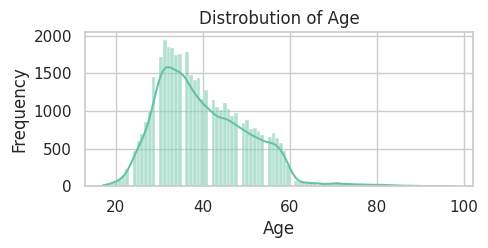

In [68]:
plt.figure(figsize = (5,2))
sns.histplot(bank_data["age"], kde = True)
plt.title("Distrobution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

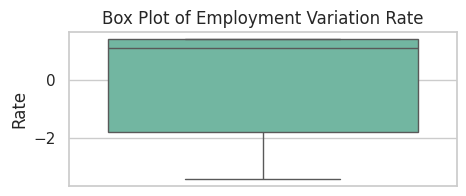

In [69]:
plt.figure(figsize = (5,2))
sns.boxplot(bank_data["emp.var.rate"])
plt.title("Box Plot of Employment Variation Rate")
plt.ylabel("Rate")
plt.show()

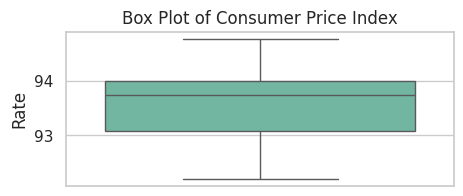

In [70]:
plt.figure(figsize = (5,2))
sns.boxplot(bank_data["cons.price.idx"])
plt.title("Box Plot of Consumer Price Index")
plt.ylabel("Rate")
plt.show()

Now I am going to show "pdays" column but since 999 means the client was not previously contacted, I will exclude it from the plot.

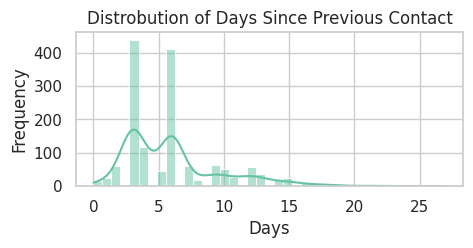

In [71]:
plt.figure(figsize = (5,2))
sns.histplot(bank_data[bank_data["pdays"] != 999]["pdays"], kde = True)
plt.title("Distrobution of Days Since Previous Contact")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

#### 2.3.2 Categorical Features

Now I will analyze the plot of categorical features. Since they are categorical, there are many values that entered as "unknown" and "nonexistent". I want to have clear plots so I will exclude them.

To do this with cleaner codes, I will filter them beforehand.

In [72]:
filtered_job = bank_data[bank_data["job"] != "unknown"]["job"]
filtered_marital = bank_data[bank_data["marital"] != "unknown"]["marital"]
filtered_education = bank_data[bank_data["education"] != "unknown"]["education"]
filtered_housing = bank_data[bank_data["housing"] != "unknown"]["housing"]
filtered_loan = bank_data[bank_data["loan"] != "unknown"]["loan"]
filtered_poutcome = bank_data[bank_data["poutcome"] != "nonexistent"]["poutcome"]

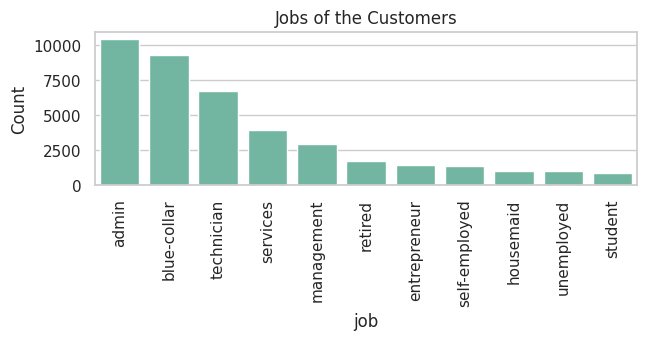

In [73]:
plt.figure(figsize=(7, 2))
sns.barplot(x=filtered_job.value_counts().index,
            y=filtered_job.value_counts().values)
plt.title("Jobs of the Customers")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

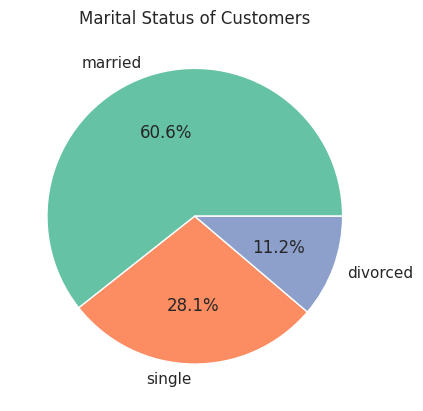

In [74]:
plt.pie(
    filtered_marital.value_counts(),
    labels=filtered_marital.value_counts().index,
    autopct='%1.1f%%'
)
plt.title("Marital Status of Customers")
plt.show()

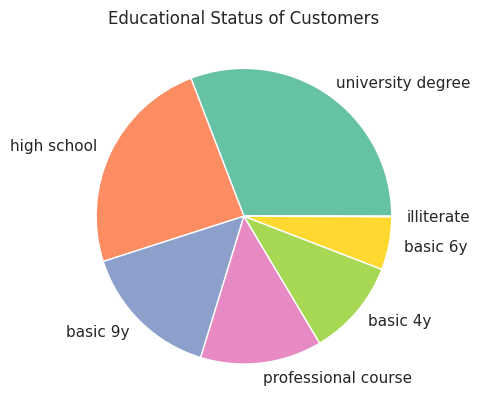

In [75]:
plt.pie(x = filtered_education.value_counts(),
        labels = filtered_education.value_counts().index)
plt.title("Educational Status of Customers")
plt.show()

Now I am going to plot "housing" and "loan" columns but I will exclude unknown.

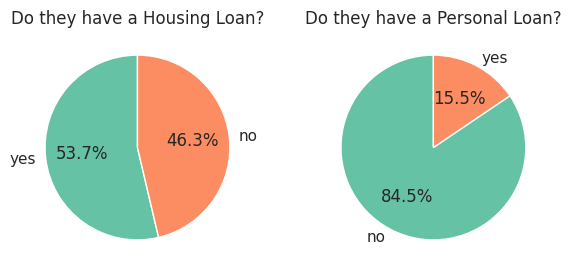

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(7,3))

axes[0].pie(x = filtered_housing.value_counts(),
            labels = filtered_housing.value_counts().index,
            startangle=90, autopct='%1.1f%%')
axes[0].set_title("Do they have a Housing Loan?")

axes[1].pie(x = filtered_loan.value_counts(),
            labels = filtered_loan.value_counts().index,
            startangle=90, autopct='%1.1f%%')
axes[1].set_title("Do they have a Personal Loan?")

plt.show()

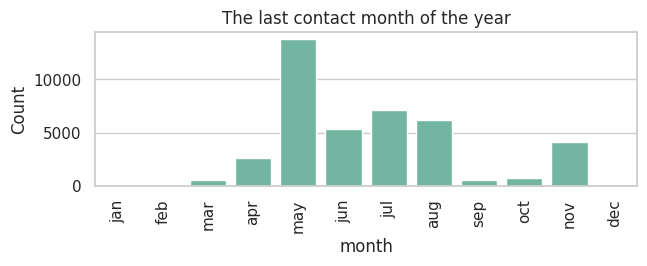

In [77]:
month_order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

plt.figure(figsize=(7, 2))
sns.barplot(x=bank_data["month"].value_counts().index,
            y=bank_data["month"].value_counts().values,
            order = month_order)
plt.title("The last contact month of the year")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

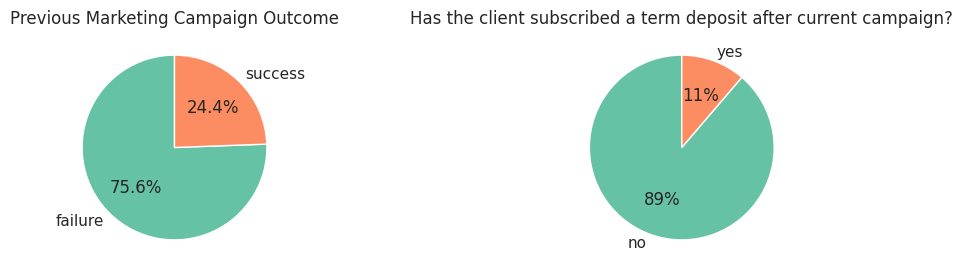

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12,3))

axes[0].pie(x = filtered_poutcome.value_counts(),
            labels = filtered_poutcome.value_counts().index,
            startangle=90, autopct='%1.1f%%')
axes[0].set_title("Previous Marketing Campaign Outcome")

axes[1].pie(bank_data["y"].value_counts(),
            labels=bank_data["y"].value_counts().index,
            startangle=90, autopct='%1.0f%%')
axes[1].set_title("Has the client subscribed a term deposit after current campaign?")

plt.show()

### 2.4 Bivariate and Multivariate Analysis of the Data

> Multivariate analysis is a subdivision of statistics encompassing the simultaneous observation and analysis of more than one outcome variable. It statistics concerns understanding the different aims and background of each of the different forms of multivariate analysis, and how they relate to each other.

When we plot the multivariate analysis of the data, we have many plotting options such as count plots, bar plots, box plots, violin plots, and scatter plots. Each of them is used depending on the scenario we face.

Below I used:
*   **Stacked Bar Plot**: A very useful plot style for observing the corelations between **categorical - categorical** data.
*   **Scatter Plot**: Handy for **numeric - numeric** data plotting
*   **Box Plot**: Common plot type for **numeric - categorical** data because it helps us to observe quartile ranges and so on.






#### 2.4.1 Categorical - Categorical Features

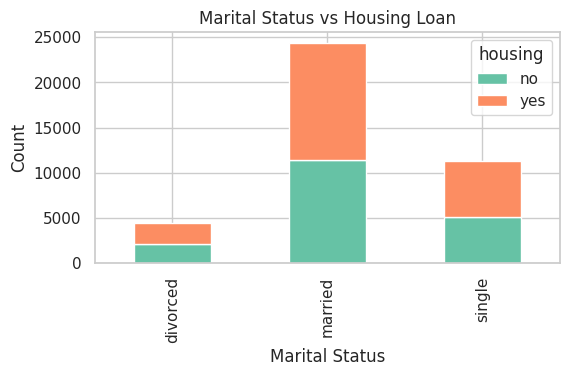

In [79]:
marital_housing = bank_data.groupby([filtered_marital, filtered_housing]).size().unstack()
marital_housing.plot(kind="bar", stacked=True, figsize=(6, 3))
plt.title("Marital Status vs Housing Loan")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

According to chart above:

- It's easily observed that married people apply housing loan the most.
- Divorced people apply the least.

We can draw some insights about the relationship between marital status and housing loans.

- Married people can be the main target customer profile for housing loans campaigns. There can be some options that targets single people, too.
- Also, customers of this bank are married, significantly.

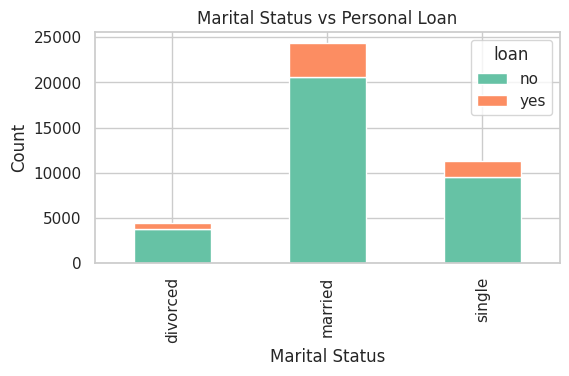

In [80]:
marital_housing = bank_data.groupby([filtered_marital, filtered_loan]).size().unstack()
marital_housing.plot(kind="bar", stacked=True, figsize=(6, 3))
plt.title("Marital Status vs Personal Loan")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

According to chart above:

- It's easily observed that married people apply personal loan the most.
- Divorced people apply the least.

We can draw some insights about the relationship between marital status and personal loans.
- Married people are the most-likely people to apply a personal loan.
- Married people are the most-likely people to apply a **general loan**.
- Divorced people are the least-likely to apply a loan.

In general, there are much less demand for personal loans than housing loans. People prioritizes the housing debt than personal debt. This country, or city does not have a housing crisis apparently.

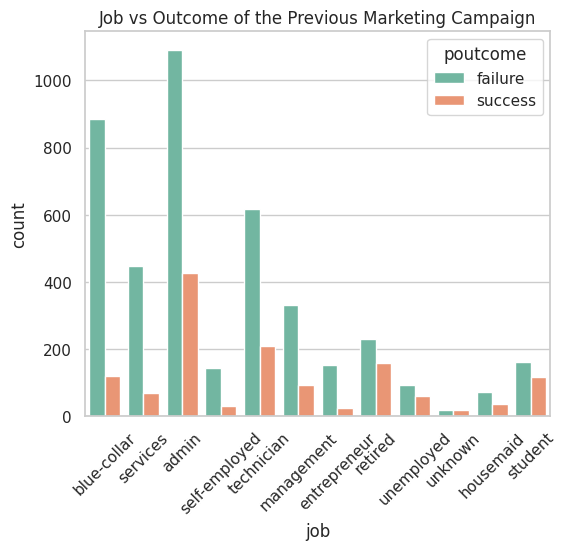

In [81]:
job_poutcome = bank_data[bank_data["poutcome"] != "nonexistent"][["job", "poutcome"]]

plt.figure(figsize=(6, 5))
sns.countplot(data = job_poutcome, x="job", hue="poutcome")
plt.title("Job vs Outcome of the Previous Marketing Campaign")
plt.xticks(rotation=45)
plt.show()

According to chart above:
- The campaign has the least success rate in blue-collar workers. We can even say that the campaign is failed for them.
- Services, self-employed, entrepreneurs have the least success rate after the blue-collars.
- The campaign has a very high success rate for students, housemaids, retired people and unemployed people.

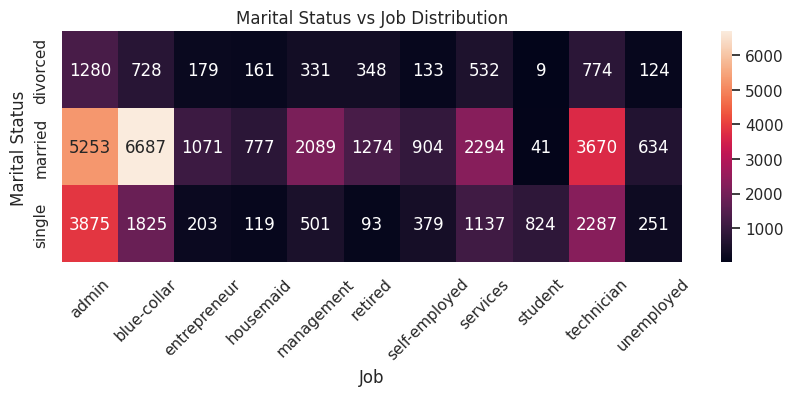

In [82]:
cross_tab = pd.crosstab(filtered_marital, filtered_job)
plt.figure(figsize=(10, 3))
sns.heatmap(cross_tab, annot=True, fmt="d")
plt.title("Marital Status vs Job Distribution")
plt.xlabel("Job")
plt.ylabel("Marital Status")
plt.xticks(rotation=45)
plt.show()

Heatmap shows that:
- If married and blue-collar people are more eager to get a housing loan (according to previous graphics and current), then they have a very high positive outcome potentional.

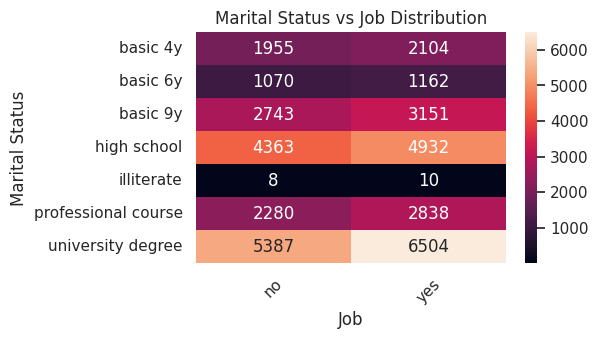

In [83]:
cross_tab = pd.crosstab(filtered_education, filtered_housing)
plt.figure(figsize=(5, 3))
sns.heatmap(cross_tab, annot=True, fmt="d")
plt.title("Marital Status vs Job Distribution")
plt.xlabel("Job")
plt.ylabel("Marital Status")
plt.xticks(rotation=45)
plt.show()

#### 2.4.1 Categorical - Numeric Features

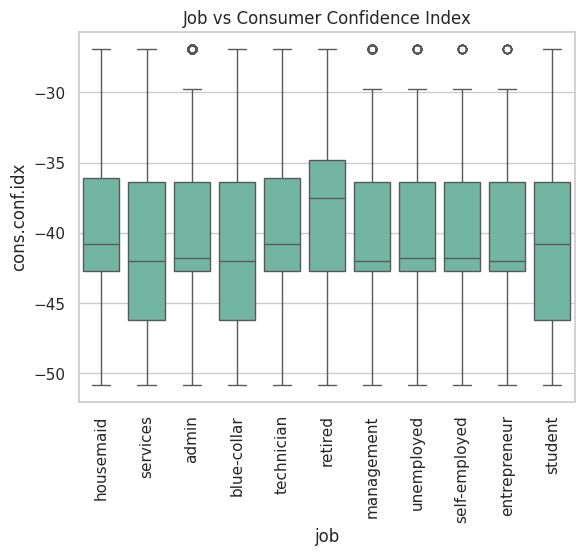

In [84]:
sns.boxplot(data=bank_data, x=filtered_job, y="cons.conf.idx")
plt.title("Job vs Consumer Confidence Index")
plt.xticks(rotation=90)
plt.show()

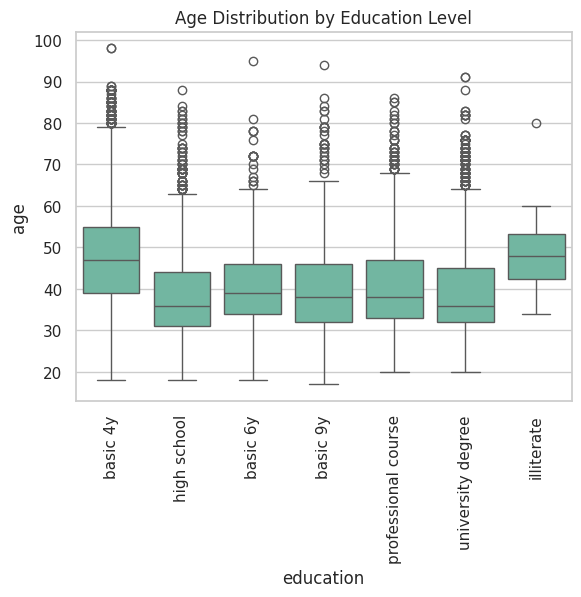

In [85]:
sns.boxplot(data=bank_data, x=filtered_education, y = "age")
plt.title("Age Distribution by Education Level")
plt.xticks(rotation=90)
plt.show()

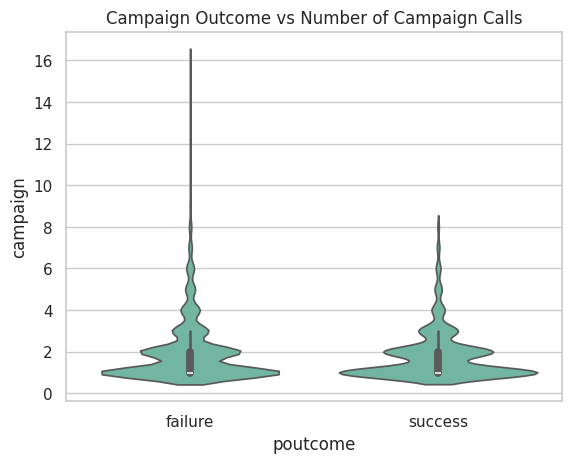

In [86]:
sns.violinplot(data=bank_data, x=filtered_poutcome, y="campaign")
plt.title("Campaign Outcome vs Number of Campaign Calls")
plt.show()

In the graph abouve, we can observe the median values, skewnesses, interquartile ranges etc. of consumer confidence index for all job categories. Box plots can be applied nearly every categorical - numeric multivariate analysis cases.

#### 2.4.3 Numeric - Numeric Features

Below we can obtain correlations and distrobutions of numeric features on each other.

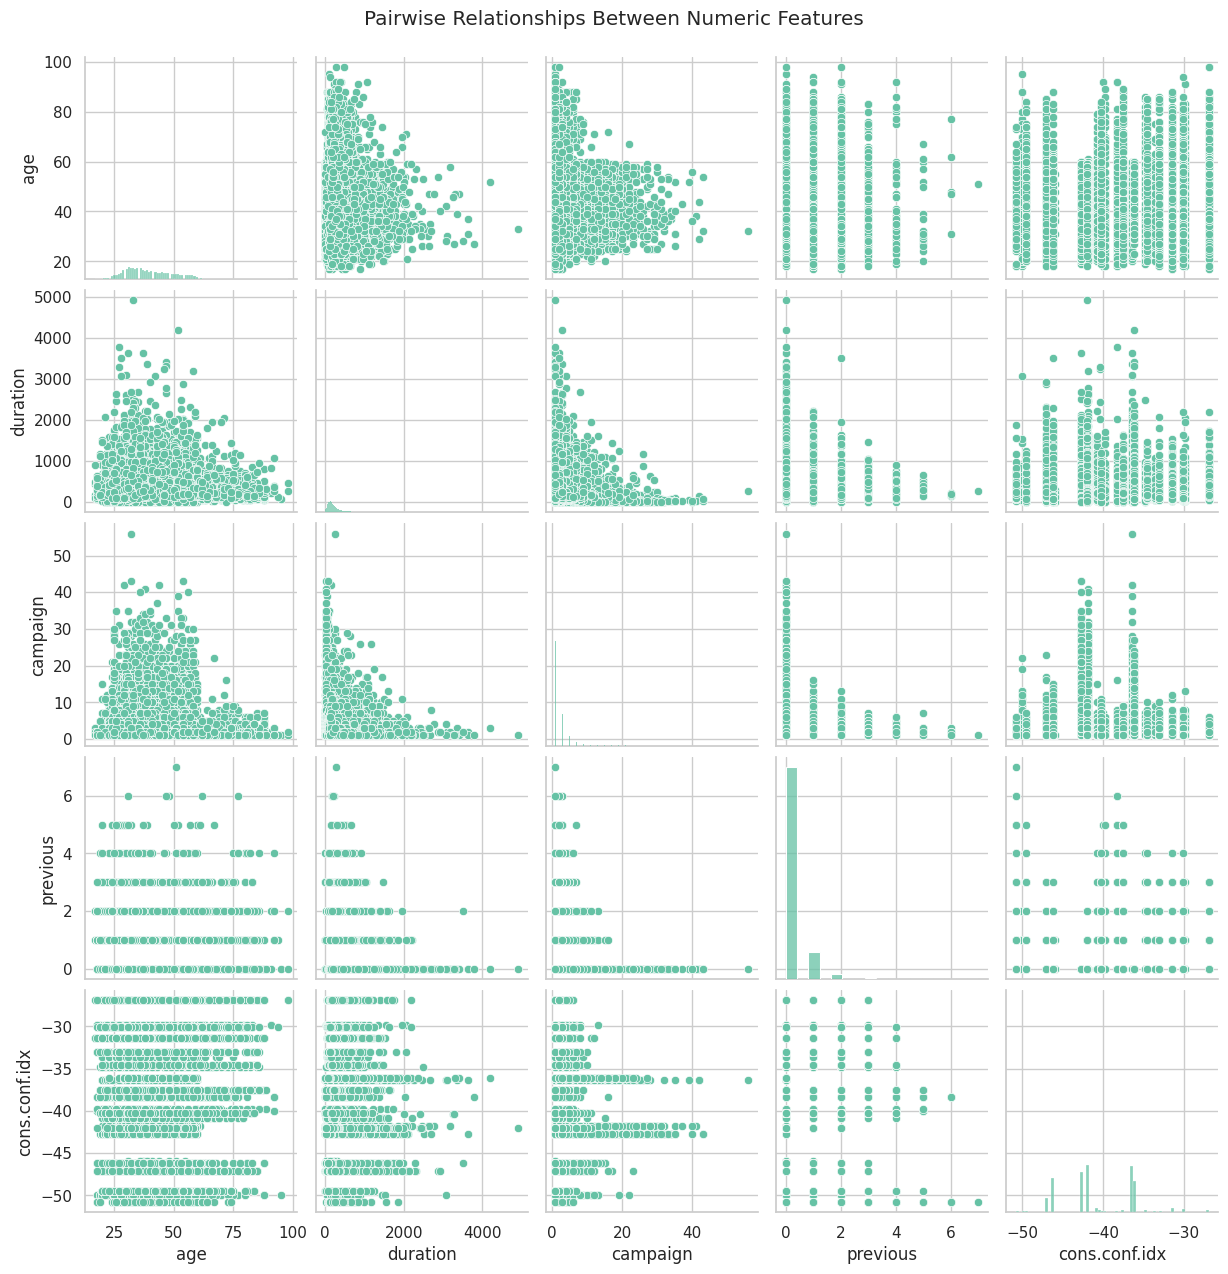

In [87]:
sns.pairplot(bank_data[["age", "duration", "campaign", "previous", "cons.conf.idx"]])
plt.suptitle("Pairwise Relationships Between Numeric Features", y=1.02)
plt.show()

#### 2.4.4 Multivariate Analysis

Below we can obtain the outliers and relations.

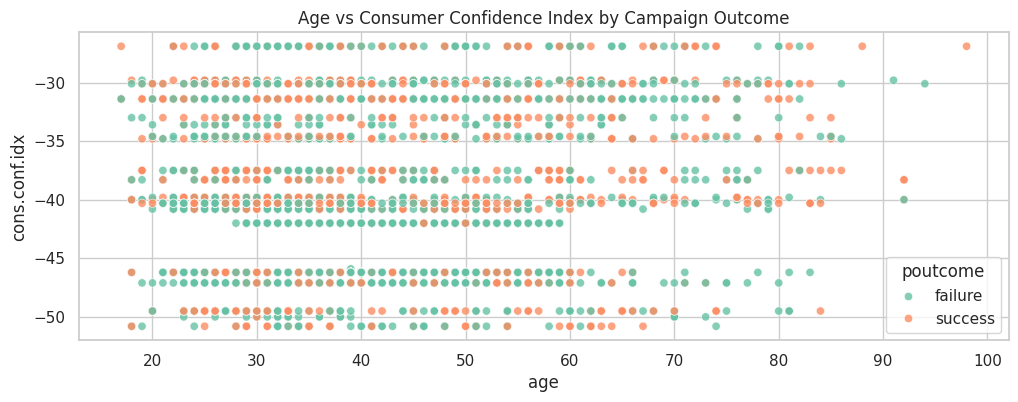

In [88]:
plt.figure(figsize = (12,4))
sns.scatterplot(data=bank_data, x="age", y="cons.conf.idx", hue=filtered_poutcome, alpha = 0.8)
plt.title("Age vs Consumer Confidence Index by Campaign Outcome")
plt.show()

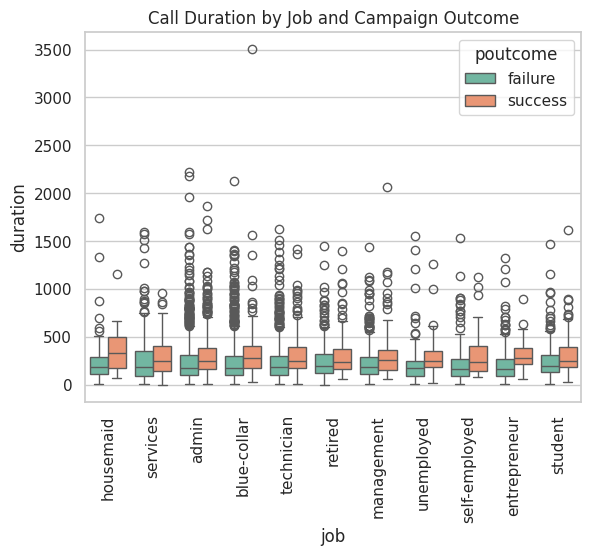

In [89]:
sns.boxplot(data=bank_data, x=filtered_job, y="duration", hue=filtered_poutcome)
plt.title("Call Duration by Job and Campaign Outcome")
plt.xticks(rotation=90)
plt.show()

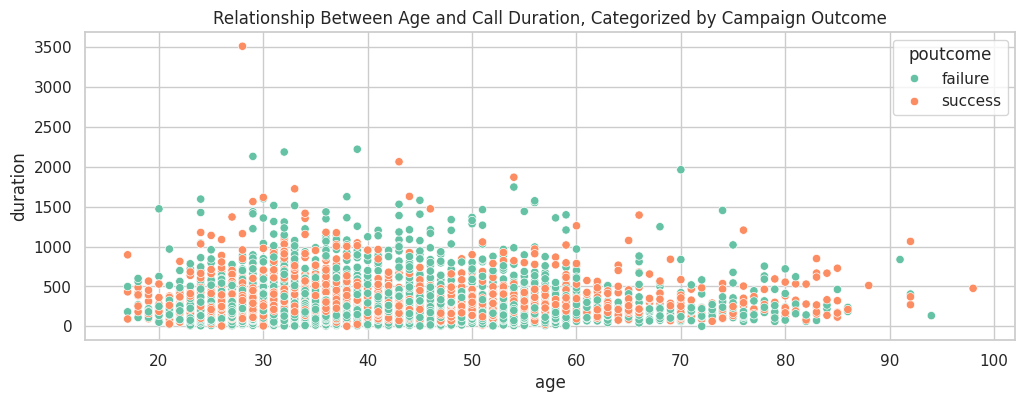

In [90]:
plt.figure(figsize = (12,4))
sns.scatterplot(data=bank_data, x="age", y="duration", hue=filtered_poutcome)
plt.title("Relationship Between Age and Call Duration, Categorized by Campaign Outcome")
plt.show()

Below we can see the correlation matrix of numeric variables. Some of the variables are highly correlated but they might be irrelevant.

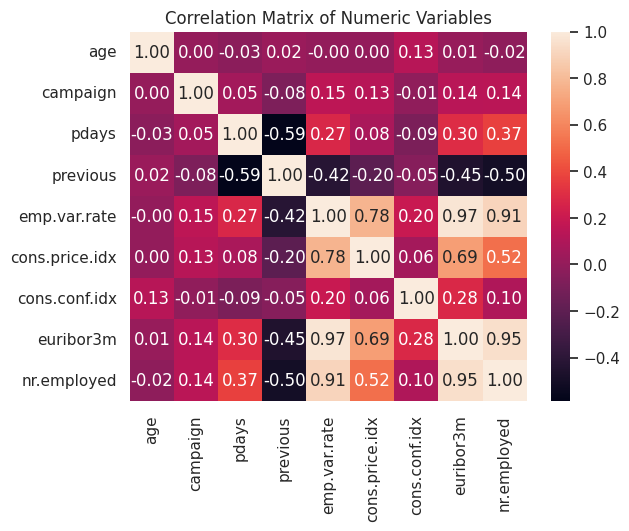

In [91]:
corr_matrix = bank_data[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

### 2.5 Conclusion I

During the process, we surveyed the dataset to find patterns. Found abnormalities and understand the structure of data

* **Univariate analysis:** We examine the distribution of numerical and categorical features. There were no missing values ​​in the dataset. This makes the preparation process easier. Outliers were identified in some number columns. This signals the need for data cleaning.<br><br>
* **Multivariate analysis:** Analyze the relationship between features through a correlation matrix. scatter chart and hierarchical connections This analysis revealed important interactions, such as the relationship between housing credit and marital status.<br><br>
* This exploratory analysis provides a comprehensive understanding of the dataset. and prepares us for the next step of data preparation and modeling.

# **3.0 Data Preparation**

### 3.1 Preparation

> Data preparation is the process of preparing raw data so that it is suitable for further processing and analysis.

**Important note**:

* The attribute "**duration**" highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Therefore I am going to exclude duration from my data.

In [92]:
bank_data = bank_data.drop("duration", axis=1)

We can start with detecting the **missing elements**.

In [93]:
bank_data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


Let's see if we have duplicated entries in the data

In [94]:
bank_data.duplicated().sum()

1784

We have 1784 duplicates! I'm going to print them firstly in order to show.<br>
After that I will drop them with pandas.

In [95]:
duplicates = bank_data[bank_data.duplicated()]
display(duplicates.head())
bank_data = bank_data.drop_duplicates(keep = "last")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
11,25,services,single,high school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
16,35,blue-collar,married,basic 6y,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
31,59,technician,married,unknown,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
104,52,admin,divorced,university degree,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


By using keep = "last", we prevent our original data to be deleted.
<br> We have no duplicates anymore.

In [96]:
bank_data.duplicated().sum()

0

I'm going to convert the categorical data with LabelEncoder

In [97]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in categorical_columns:
               bank_data[column] = le.fit_transform(bank_data[column])

In [98]:
display(bank_data.tail())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,5,1,5,0,2,0,0,7,0,1,999,0,1,-1.10,94.77,-50.80,1.03,4963.60,1
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.10,94.77,-50.80,1.03,4963.60,0
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.10,94.77,-50.80,1.03,4963.60,0
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.10,94.77,-50.80,1.03,4963.60,1
41187,74,5,1,5,0,2,0,0,7,0,3,999,1,0,-1.10,94.77,-50.80,1.03,4963.60,0


Now I'm going to scale the data. But before this, I need to detect the outliers. The best way of detect outliers is the z-score method. I prefer it because it comes with Scipy, easy to apply and I learned it in my university statistics class so it's more reliable for me. At least I'm aware of what I'm doing when I use z-score :).

In [99]:
from scipy.stats import zscore

z_scores = np.abs(zscore(bank_data[numeric_columns]))
outliers = (z_scores > 3)
outliers_rows = bank_data[(z_scores > 3).any(axis=1)]
display(outliers_rows.head())
display(outliers_rows.tail())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2234,47,4,1,6,0,0,0,1,6,1,12,999,0,1,1.10,93.99,-36.40,4.86,5191.00,0
2554,31,0,1,3,1,2,0,1,6,3,13,999,0,1,1.10,93.99,-36.40,4.86,5191.00,0
2613,47,1,1,0,0,2,0,1,6,3,12,999,0,1,1.10,93.99,-36.40,4.86,5191.00,0
2631,48,9,2,7,0,1,1,1,6,3,19,999,0,1,1.10,93.99,-36.40,4.86,5191.00,0
2735,39,1,1,1,0,0,0,1,6,4,12,999,0,1,1.10,93.99,-36.40,4.86,5191.00,0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41175,34,8,2,7,0,2,0,0,7,2,1,999,2,0,-1.10,94.77,-50.80,1.03,4963.60,0
41178,62,5,1,6,0,0,0,0,7,2,2,6,3,2,-1.10,94.77,-50.80,1.03,4963.60,1
41182,29,10,2,0,0,2,0,0,7,0,1,9,1,2,-1.10,94.77,-50.80,1.03,4963.60,0
41183,73,5,1,5,0,2,0,0,7,0,1,999,0,1,-1.10,94.77,-50.80,1.03,4963.60,1
41187,74,5,1,5,0,2,0,0,7,0,3,999,1,0,-1.10,94.77,-50.80,1.03,4963.60,0


In [100]:
bank_data_no_outliers = bank_data[(z_scores <= 3).all(axis=1)]

print("The number of rows in the data now:", len(bank_data_no_outliers))

bank_data = bank_data_no_outliers

The number of rows in the data now: 36529


We got rid of more than 4.000 rows with outliers.
They could led us to develop wrong decisions at the end.<br>

Now I will use Kolmogorov - Smirnov test to see the distrobution. I use Kolmogorof - Smirnov because Shapiro - Wilk test is trustable only when data has a small mass. When we deal with massive datasets like this, we can get more accurate results with Kolm.- Smirn. After this, I will decide which scaling method should I use.

In [101]:
from scipy.stats import kstest

for feature in numeric_columns:
    data_column = bank_data[feature]
    stat, p_value = kstest(data_column, 'norm')

    if p_value > 0.05:
        display(f"{feature} has: Normal Distrobution")
    else:
        display(f"{feature} has: NOT Normal Distrobution")

'age has: NOT Normal Distrobution'

'campaign has: NOT Normal Distrobution'

'pdays has: NOT Normal Distrobution'

'previous has: NOT Normal Distrobution'

'emp.var.rate has: NOT Normal Distrobution'

'cons.price.idx has: NOT Normal Distrobution'

'cons.conf.idx has: NOT Normal Distrobution'

'euribor3m has: NOT Normal Distrobution'

'nr.employed has: NOT Normal Distrobution'

Now the data has no outliers and no normal distrobution. Therefore I'm going to use Min Max Scaler for the scaling process.
<br> If there was a normal distrobution, I could use Standart Scaler.

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

bank_data[numeric_columns] = scaler.fit_transform(bank_data[numeric_columns])

display(bank_data.tail())

<ipython-input-102-89cc31dd08ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data[numeric_columns] = scaler.fit_transform(bank_data[numeric_columns])


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41180,0.35,0,1,6,0,0,0,0,7,0,0.10,0.00,0.00,1,0.48,1.00,0.00,0.09,0.00,0
41181,0.37,0,1,6,0,2,0,0,7,0,0.00,0.00,0.00,1,0.48,1.00,0.00,0.09,0.00,1
41184,0.54,1,1,5,0,0,0,0,7,0,0.00,0.00,0.00,1,0.48,1.00,0.00,0.09,0.00,0
41185,0.72,5,1,6,0,2,0,0,7,0,0.10,0.00,0.00,1,0.48,1.00,0.00,0.09,0.00,0
41186,0.50,9,1,5,0,0,0,0,7,0,0.00,0.00,0.00,1,0.48,1.00,0.00,0.09,0.00,1


### 3.2 Conclusion II

During the data preparation process We have taken several steps to ensure that the dataset is clean and ready for size reduction:

* **Outlier Handling:** Outliers are corrected using the Z-score method, which effectively removes extreme values ​​from the dataset. This step significantly reduces data noise while preserving important formatting.Also the categorical variables are transformed using label encoding. <br><br>

* **Scaling:** Numerical features are normalized to ensure consistent scaling across all variables. Problems during size reduction techniques are eliminated.
At the end of this period the dataset is free from irrelevant data and outliers. It is properly coded and scaled. This makes it suitable for the application of dimensionality reduciton techniques.

# **4.0 Dimensionality Reduction**

> Dimensionality reduction is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension.

### 4.1 Deciding Which Method to Use

* The dataset is a big dataset. I will try both of the PCA and t-SNE and decide according to result. Firstly, I will try the dimensionality reduction with PCA.
* After that, I will test t-SNE with a small subset of the data (because t-SNE is a more costly reduction method).
* Finally, I will analyse both of the results and decide.

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

X_norm = bank_data.drop("y", axis=1)
y = bank_data['y']

X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, random_state=13, test_size=0.25, shuffle=True
)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test,)

print(pca.score(X_train))
print(pca.score(X_test))

-23.74260629526136
-23.79678226796116


 The train_test_split() function is used to split the data into training and testing sets, where X_norm and y are split into X_train, X_test, y_train, and y_test.<br>
 The random_state parameter is set to 13 to ensure reproducibility, and test_size is set to 0.25 to allocate 25% of the data to the testing set.

According to output, PCA score is not good at both train and test results.

We will now visualize the PCA result using the Plotly Express scatter plot.

In [107]:
import plotly.express as px

fig = px.scatter(x=X_train_pca[:, 0], y=X_train_pca[:, 1], color=y_train)
fig.update_layout(
    title="PCA visualization of Bank Dataset",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
    height = 300,
    width = 600
)
fig.show()

* As seen, PCA was not good at creating clusters. The data in the low dimension looks random. It could also mean the features in the dataset are highly skewed, or it does not have a strong correlation structure.

Therefore I will try t-SNE this time. But before this, I need to determine the optimal perplexity value.

In [108]:
perplexity = np.arange(5, 55, 5)
divergence = []

sub_data = bank_data.head(2500) # daha sonra 5000 yap

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(sub_data)
    divergence.append(model.kl_divergence_)
fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence", height = 300, width = 600)
fig.update_traces(line_color="red", line_width=1)
fig.show()

According to graph, picking 40 as the perplexity value is a good choice.

In [109]:
sub_data = bank_data.head(2500)

tsne = TSNE(n_components=2,perplexity=40, random_state=42)
X_train_tsne = tsne.fit_transform(sub_data)

print(tsne.kl_divergence_)

0.614232063293457


The divergence is significantly better now. Now we will visualize the t-SNE and make the decision.

In [110]:
fig = px.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], color=y_train.head(2500))
fig.update_layout(
    title="t-SNE visualization of Bank Sub-Dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
    height = 300,
    width = 600
)
fig.show()

* Although we worked with a smaller sized version of the data, t-SNE is much better at creating clusters. Therefore I am going to use t-SNE for the Dimensionality Reduction.

### 4.2 Application of the Method

In [111]:
tsne = TSNE(n_components=2,perplexity=40, random_state=42)
X_train_tsne = tsne.fit_transform(bank_data)

print(tsne.kl_divergence_)

1.2154773473739624


In [121]:
fig = px.scatter(x=X_train_tsne[:27396, 0], y=X_train_tsne[:27396, 1], color=y_train)
fig.update_layout(
    title="t-SNE visualization of Bank Dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
    height = 300,
    width = 600
)
fig.show()

### 4.3 Conclusion III

During the dimensionality reduction phase, we used two techniques to simplify the dataset while keeping its most important information intact:

* **PCA (Principal Component Analysis):** PCA helped us understand how much variance each component captured, guiding us in choosing the optimal number of components. However, it wasn't as effective in creating distinct clusters of data points.<br><br>

* **t-SNE:** This method excelled in reducing the high-dimensional data into a clear, two-dimensional view. It performed much better than PCA at revealing clusters and separating data points.<br><br>

These techniques gave us valuable insights into the dataset's structure. While PCA was useful for understanding how information was distributed across components, t-SNE stood out for its ability to uncover patterns and clusters, making it particularly helpful for exploratory analysis.